### Wine quality prediction based on a set of values for features by using the classification and the regression approaches!
Here, I am using support vector machine as classification(SVC) and regression(SVR).


## Step 1. Importing all the necessary packages and reading the data.

In [300]:
# importing the libaries

import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

### Reading the white-wine data 

In [301]:
# Reading the white-wine csv file

white_wine= pd.read_csv("/Users/revasmac/Desktop/Data245_ML/winequality-white.csv")
print(white_wine.shape)
white_wine.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Step 2. Data Preprocessing for white-wine 

In [302]:
# Checking for NULL values
print(white_wine.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [303]:
# The descriptive statistics information of the dataset
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [304]:
# Checking for categorical values

white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [305]:
# Checking for duplicate rows

white_wine=white_wine.drop_duplicates()
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [306]:
# Creating a copy of the white-wine dataset so that the original dataset will not change.

white_new = white_wine.copy()
white_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [307]:
# renaming the headers and making one single value by adding "_" in between all the columns of white-wine dataset

white_new.columns = white_new.columns.str.replace(" ", "_")
white_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### For the binomial classification we are converting the dataset into (0 and 1) form.

In [308]:
# For the target variable(quality) we are adding one new column named "quality_rank" and making it "0" for quality between (1-6) and "1" for quality (7&8)

white_new['quality_rank'] = [1 if x >= 6 else 0 for x in white_new['quality']]
white_new.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rank
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1


In [309]:
# See proportion of wines based on quality_rank for making sure that data is not imbalanced.

white_new['quality_rank'].value_counts()

1    2613
0    1348
Name: quality_rank, dtype: int64

Based on above result we can see that it's fair enough to fit the data into model!!!

In [310]:
# Separating the feature variables and target variable

X_white = white_new.drop(['quality','quality_rank'], axis = 1)
y_white = white_new['quality_rank']

In [311]:
# Standardizing feature variables in order to equalize the range of the data.

from sklearn.preprocessing import StandardScaler

X_features_white = X_white
X_white= StandardScaler().fit_transform(X_white)

## Step 3. Preparing dataset for modeling.

In [312]:
# Splitting the data into 70% training and 30% test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=10)


### Classification model for white-wine using SVC

In [313]:
#Import svc model

from sklearn.svm import SVC
WhiteClf = SVC(probability=True)

#Train the model using the training sets
WhiteClf.fit(X_train, y_train)

SVC(probability=True)

In [314]:

#Test the model with the test dataset for predictions(without the labels).
WhiteClf_y_pred=WhiteClf.predict(X_test)
WhiteClf_y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [315]:
# check the parameter used in the model. 
print(WhiteClf.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [316]:
# evaluating the classification report 
print(metrics.classification_report(y_test, WhiteClf_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65       432
           1       0.79      0.89      0.83       757

    accuracy                           0.77      1189
   macro avg       0.76      0.73      0.74      1189
weighted avg       0.77      0.77      0.77      1189



In [317]:
#Model Accuracy: how often is the classifier correct?
print("Accuracy before fine tuning:",metrics.accuracy_score(y_test, WhiteClf_y_pred)*100)

Accuracy before fine tuning: 77.46005046257359


We got 77.46 accuracy. Now let's try parameters tuned to check if the accuracy increase after fine tuning. And Here is when the usefulness of GridSearch comes into picture. We can search for parameters using a GridSearch!

### SVM hyper-parameters optimization for white wine

In [318]:
from sklearn.model_selection import GridSearchCV
  
# Set the parameters by cross-validation
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
gridWhiteClf = GridSearchCV(SVC(probability=True),param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridWhiteClf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.9s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   1.8s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   6.6s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   6.5s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   7.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   6.9s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   9.3s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   4.7s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   4.6s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   4.6s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [319]:
# print best parameter after tuning
print(gridWhiteClf.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [320]:
# print how our model looks after hyper-parameter tuning
# selecting the best estimator
print(gridWhiteClf.best_estimator_)

SVC(C=100, gamma=0.01, probability=True)


In [321]:
# Model prediction on test data after fine tuning
gridWhiteClf_y_pred = gridWhiteClf.predict(X_test)
gridWhiteClf_y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [322]:
#Model Accuracy: how often is the classifier correct?
print("Accuracy after fine tuning:",metrics.accuracy_score(y_test, gridWhiteClf_y_pred)*100)

Accuracy after fine tuning: 77.03952901597981


We got 77.03 accuracy after fine tuning. It means hyperparameter tuning did not help to increase the accuracy.

### Evaluation metric for white wine classification 

In [323]:
import sys
!{sys.executable} -m pip install scikit-plot

In [324]:
import seaborn as sns
import scikitplot as skplt
from inspect import signature

In [325]:
# determine precision score 
print("precision_score:",metrics.precision_score(y_test, gridWhiteClf_y_pred))

precision_score: 0.782051282051282


In [326]:
# determine recall score 
print("recall_score:",metrics.recall_score(y_test, gridWhiteClf_y_pred))

recall_score: 0.8863936591809776


Text(0.5, 1.0, 'Precision-Recall AUC=0.77')

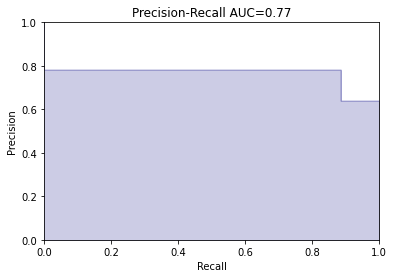

In [327]:
# Plotting the precision-recall curve 

precision, recall, threshold = metrics.precision_recall_curve(y_test, gridWhiteClf_y_pred)

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='navy', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
x = plt.xlabel('Recall')
y = plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall AUC={0:0.2f}'.format(average_precision_score(
        y_test, gridWhiteClf_y_pred)))

In [328]:
# determine the average precision score
print("average_precision_score:",metrics.average_precision_score(y_test, gridWhiteClf_y_pred))

average_precision_score: 0.7655349863787402


In [329]:
# determine f1_score
print("f1_score:",metrics.f1_score(y_test, gridWhiteClf_y_pred))

f1_score: 0.8309597523219814


In [330]:
# To calculate the probability 
prob_white = gridWhiteClf.predict_proba(X_test)
prob_white

array([[0.37205001, 0.62794999],
       [0.24288349, 0.75711651],
       [0.31915914, 0.68084086],
       ...,
       [0.12710979, 0.87289021],
       [0.15898107, 0.84101893],
       [0.59375804, 0.40624196]])

In [331]:
# determine the roc_auc_score
print("roc_auc_score:",metrics.roc_auc_score(y_test, gridWhiteClf_y_pred))

roc_auc_score: 0.7267616444053036


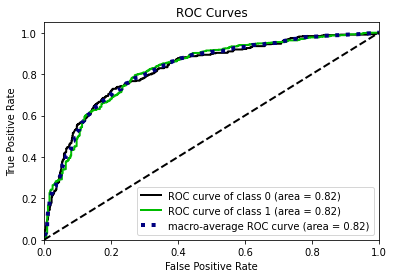

In [332]:
# Plotting the ROC curve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, prob_white, plot_micro=False)
plt.show()

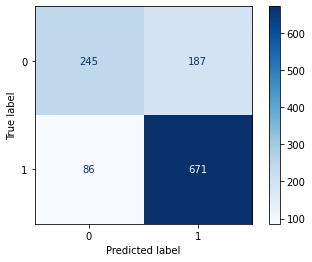

In [333]:
# plotting the confusion matrix
metrics.plot_confusion_matrix(gridWhiteClf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show() 

In [334]:
# determine the classifcation report.
print("classification_report:\n",metrics.classification_report(y_test, gridWhiteClf_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.74      0.57      0.64       432
           1       0.78      0.89      0.83       757

    accuracy                           0.77      1189
   macro avg       0.76      0.73      0.74      1189
weighted avg       0.77      0.77      0.76      1189



### Regression model for white-wine using SVR

In [335]:
# importing libraries for regression
from sklearn import svm

In [336]:
# fitting the model

WhiteRegr = svm.SVR(kernel = 'rbf')
WhiteRegr.fit(X_train, y_train)

SVR()

In [337]:
# Predict the response for test dataset
WhiteRegr_y_pred = WhiteRegr.predict(X_test)
WhiteRegr_y_pred

array([0.5452555 , 0.93419864, 0.61742921, ..., 1.0689627 , 0.94648223,
       0.16030374])

### Fine tuning with GridSearchCV for white wine

In [338]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('rbf', 'poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
gridWhiteRegr = GridSearchCV(svr, parameters)
gridWhiteRegr.fit(X_train,y_train)

# print best parameter after tuning
gridWhiteRegr.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [339]:
# Selecting the best estimator

gridWhiteRegr.best_estimator_

SVR(C=10, epsilon=0.3, gamma=0.0001)

In [340]:
# Model prediction on test data after fine tuning
gridWhiteRegr_y_pred = gridWhiteRegr.predict(X_test)
gridWhiteRegr_y_pred

array([0.63993472, 0.58480245, 0.46474833, ..., 0.83089799, 0.78908732,
       0.4798161 ])

### Evaluation metric for white wine regression

In [341]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Check the r2-score value.
print('\033[1m'+"The R2_Score:"+'\033[0m',metrics.r2_score(y_test, gridWhiteRegr_y_pred))
# determine MAE score
print('\033[1m'+"Mean Absolute Error:"+'\033[0m',metrics.mean_absolute_error(y_test, gridWhiteRegr_y_pred))
# determine MSE score
print('\033[1m'+"The Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(y_test, gridWhiteRegr_y_pred, squared=True))
# determine rmse score
print('\033[1m'+"The Root Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(y_test, gridWhiteRegr_y_pred, squared=False))


The R2_Score: 0.24075053299366367
Mean Absolute Error: 0.36877064056460546
The Mean Squared Error: 0.17563069212261834
The Root Mean Squared Error: 0.41908315657231837


## Reading the Red wine data

In [342]:
# Reading the red-wine csv file

red_wine= pd.read_csv("/Users/revasmac/Desktop/Data245_ML/winequality-red.csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Preprocessing for red-wine ##

In [343]:
# Checking for NULL values

print(red_wine.isnull().values.any())

False


In [344]:
# summary
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [345]:
# Checking for categorical values

print(red_wine.shape)

red_wine.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [346]:
# Checking for duplicate rows

red_wine=red_wine.drop_duplicates()
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [347]:
# Creating a copy of the red wine dataset so that the original dataset will not change.

red_new = red_wine.copy()
red_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [348]:
# renaming headers into single value by adding "_" in between all the columns of red-wine dataset

red_new.columns = red_wine.columns.str.replace(" ", "_")
red_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [349]:
# For binary classification of the target variable we are adding one new column named "quality_rank" and making it "0" for quality between (1-6) and "1" for quality (7&8)

# Create Classification version of target variable
red_new['quality_rank'] = [1 if x >= 6 else 0 for x in red_wine['quality']]
red_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rank
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [350]:
# Separating the feature variables and target variable

X_red = red_new.drop(['quality','quality_rank'], axis = 1)
y_red = red_new['quality_rank']

In [351]:
# See proportion of wines based on quality_rank for making sure that data is not imbalanced.

red_new['quality_rank'].value_counts()

1    719
0    640
Name: quality_rank, dtype: int64

#### Based on above result we can see that it's fair enough to fit the data into model!!!####

## Preparing data for modeling ##

#### Standardizing feature variables in order to equalize the range of the data.####

In [352]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler

X_features_red = X_red 
X_red = StandardScaler().fit_transform(X_red)

In [353]:
# Splitting the data into training and test dataset in the ratio 7:3.

from sklearn.model_selection import train_test_split
X_true, X_test, y_true, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=0)

## Classification Model for red-wine using SVC

In [354]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
RedClf = svm.SVC()

#Train the model using the training sets
RedClf.fit(X_true, y_true)

#Predict the response for test dataset
RedClf_y_pred = RedClf.predict(X_test)
RedClf_y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [355]:
# check the parameter used in the model. 
print(RedClf.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [356]:
# evaluating the classification report 
print(metrics.classification_report(y_test, RedClf_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       192
           1       0.78      0.72      0.75       216

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.75       408
weighted avg       0.75      0.75      0.75       408



In [357]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy: how often is the classifier correct?
print("Accuracy before fine tuning:",metrics.accuracy_score(y_test, RedClf_y_pred)*100)

Accuracy before fine tuning: 74.75490196078431


## Regression model for red-wine ##

We got 77.46 accuracy. Now let's try parameters tuned to chcek if the accuracy increase after fine tuning. And Here is when the usefulness of GridSearch comes into picture. We can search for parameters using a GridSearch!

### SVM hyper-parameters optimization for red-wine

In [358]:
from sklearn.model_selection import GridSearchCV
  
# Set the parameters by cross-validation
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
gridRedClf = GridSearchCV(SVC(probability=True),param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridRedClf.fit(X_true, y_true)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.9s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.8s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.8s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.7s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [359]:
# print best parameter after tuning
print(gridRedClf.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [360]:
# print how our model looks after hyper-parameter tuning
# selecting the best estimator
print(gridRedClf.best_estimator_)

SVC(C=100, gamma=0.01, probability=True)


In [361]:
# Model prediction on test data after fine tuning
gridRedClf_y_pred = gridRedClf.predict(X_test)
gridRedClf_y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [362]:
#Model Accuracy: how often is the classifier correct?
print("Accuracy after fine tuning:",metrics.accuracy_score(y_test, gridRedClf_y_pred)*100)

Accuracy after fine tuning: 72.05882352941177


We got 72.05 accuracy after fine tuning. It means hyperparameter tuning did not help to increase the accuracy.

### Evaluation metric for red wine classification 

In [363]:
import seaborn as sns
import scikitplot as skplt
from inspect import signature
# determine precision score 
print("precision_score:",metrics.precision_score(y_test, gridRedClf_y_pred))

precision_score: 0.7475728155339806


In [364]:
# determine recall score 
print("recall_score:",metrics.recall_score(y_test, gridRedClf_y_pred))

recall_score: 0.7129629629629629


Text(0.5, 1.0, 'Precision-Recall AUC=0.68')

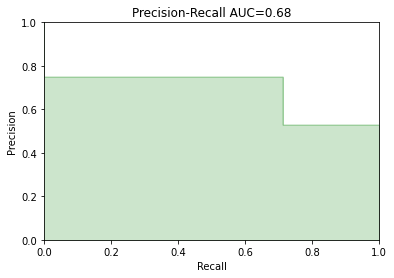

In [365]:
# Plotting the precision-recall curve 
precision, recall, threshold = metrics.precision_recall_curve(y_test, gridRedClf_y_pred)

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='green', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='green', **step_kwargs)
x = plt.xlabel('Recall')
y = plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall AUC={0:0.2f}'.format(average_precision_score(
        y_test, gridRedClf_y_pred)))

In [366]:
# determine f1_score
print("f1_score:",metrics.f1_score(y_test, gridRedClf_y_pred))

f1_score: 0.7298578199052131


In [367]:
# To calculate the probability 
prob_red = gridRedClf.predict_proba(X_test)
prob_red

array([[0.08967438, 0.91032562],
       [0.77510286, 0.22489714],
       [0.58865219, 0.41134781],
       [0.72194308, 0.27805692],
       [0.08555078, 0.91444922],
       [0.41466587, 0.58533413],
       [0.19496265, 0.80503735],
       [0.31620324, 0.68379676],
       [0.93944916, 0.06055084],
       [0.18037711, 0.81962289],
       [0.69607919, 0.30392081],
       [0.27067779, 0.72932221],
       [0.5       , 0.5       ],
       [0.8733693 , 0.1266307 ],
       [0.02254495, 0.97745505],
       [0.23977821, 0.76022179],
       [0.1812014 , 0.8187986 ],
       [0.30979695, 0.69020305],
       [0.17385826, 0.82614174],
       [0.37541667, 0.62458333],
       [0.33036728, 0.66963272],
       [0.88096125, 0.11903875],
       [0.31646952, 0.68353048],
       [0.04020933, 0.95979067],
       [0.42180102, 0.57819898],
       [0.0281401 , 0.9718599 ],
       [0.06669512, 0.93330488],
       [0.28575207, 0.71424793],
       [0.79977303, 0.20022697],
       [0.96526404, 0.03473596],
       [0.

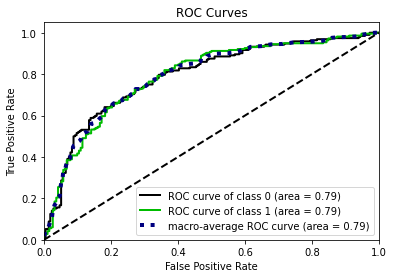

In [368]:
# Plotting the ROC curve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, prob_red, plot_micro=False)
plt.show()

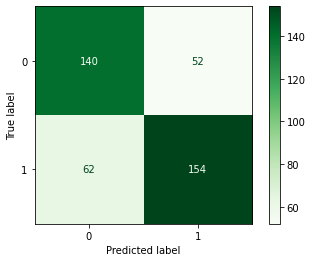

In [369]:
# plotting the confusion matrix
metrics.plot_confusion_matrix(gridRedClf, X_test, y_test, cmap=plt.cm.Greens)  
plt.show() 

In [370]:
# determine the classifcation report.
print("classification_report:\n",metrics.classification_report(y_test, gridRedClf_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       192
           1       0.75      0.71      0.73       216

    accuracy                           0.72       408
   macro avg       0.72      0.72      0.72       408
weighted avg       0.72      0.72      0.72       408



### Regression model for red-wine using SVR

In [371]:
# importing libraries for regression
from sklearn import svm

# fitting the model
RedRegr = svm.SVR(kernel = 'rbf')
RedRegr.fit(X_true, y_true)

SVR()

In [372]:
# Predict the response for test dataset
RedRegr_y_pred = RedRegr.predict(X_test)
RedRegr_y_pred

array([ 1.10899016e+00,  1.81152908e-01,  3.92324230e-01,  5.36562477e-01,
        9.11008792e-01,  4.89735806e-01,  9.57266429e-01,  8.27088901e-01,
       -5.64749410e-02,  9.90022972e-01,  1.49796042e-01,  6.93454845e-01,
        2.56685578e-01,  1.61991345e-01,  1.02500095e+00,  9.24907533e-01,
        9.98447561e-01,  5.53581325e-01,  8.39486273e-01,  6.09016708e-01,
        6.56080441e-01, -1.02236577e-01,  8.36031259e-01,  1.13076997e+00,
        7.36404051e-01,  5.87184106e-01,  1.02839372e+00,  7.75752747e-01,
       -7.05654618e-03, -8.22365667e-02,  2.84355737e-01, -1.48698511e-01,
        1.53443455e-01,  6.45761193e-01,  9.73804368e-01,  8.65329266e-01,
        6.84835249e-02,  7.76863960e-01,  7.02622941e-01,  4.43278753e-01,
        6.60722648e-01,  5.16360319e-01,  1.02559500e+00,  9.59349468e-01,
        6.71640554e-01,  6.84413167e-01,  1.91219290e-01,  1.92285911e-01,
        5.90786714e-01,  6.67198516e-01,  9.87404193e-01,  5.13537266e-02,
        5.85990440e-01,  

### Fine tuning with GridSearchCV for red wine regression

In [373]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('rbf', 'poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
gridRedRegr = GridSearchCV(svr, parameters)
gridRedRegr.fit(X_true,y_true)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001], 'kernel': ('rbf', 'poly')})

In [374]:
# print best parameter after tuning
gridRedRegr.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 0.0001, 'kernel': 'rbf'}

In [375]:
# Selecting the best estimator
gridRedRegr.best_estimator_

SVR(C=10, epsilon=0.2, gamma=0.0001)

In [376]:
# Model prediction on test data after fine tuning
gridRedRegr_y_pred = gridRedRegr.predict(X_test)
gridRedRegr_y_pred

array([ 0.74439275,  0.21005607,  0.38262286,  0.65495365,  0.89664094,
        0.51785407,  0.61854347,  0.53889362,  0.19262356,  0.74576233,
        0.43870054,  0.90164207,  0.49884847,  0.12545269,  1.05722111,
        0.55140952,  0.7228223 ,  0.54100196,  0.39238742,  0.48809062,
        0.5822604 ,  0.06568643,  0.7633366 ,  0.88351538,  0.58582172,
        1.64856969,  0.99334669,  0.72284913,  0.17154317, -0.04013225,
        0.26302564,  0.13368489,  0.24992537,  0.5400242 ,  1.08872126,
        0.86038971,  0.33758935,  0.80697237,  0.51249257,  0.76772372,
        0.46129532,  0.57979222,  0.88962384,  0.75827573,  0.66371441,
        0.69222324,  0.39932606,  0.34103051,  0.50151673,  0.44479157,
        0.99107409,  0.19552949,  0.69723321,  0.52425459,  0.86401775,
        0.9695195 ,  0.35200203,  0.27420188,  0.52756022,  1.03754238,
        0.33248829,  0.46415628,  0.97797706,  0.18227789,  0.37154061,
        0.17523227,  0.38970038,  0.55846769,  0.21757506,  0.38

### Evaluation metric for red wine regression

In [377]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Check the r2-score value.
print('\033[1m'+"The R2_Score:"+'\033[0m',metrics.r2_score(y_test, gridRedRegr_y_pred))
# determine MAE score
print('\033[1m'+"Mean Absolute Error:"+'\033[0m',metrics.mean_absolute_error(y_test, gridRedRegr_y_pred))
# determine MSE score
print('\033[1m'+"The Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(y_test, gridRedRegr_y_pred, squared=True))
# determine rmse score
print('\033[1m'+"The Root Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(y_test, gridRedRegr_y_pred, squared=False))

The R2_Score: 0.23302343672703318
Mean Absolute Error: 0.37386099276903384
The Mean Squared Error: 0.19108066628253845
The Root Mean Squared Error: 0.4371277459536725
